In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import os
import pickle

In [2]:
def minmax(vec): 
    '''min max normalize 1D array'''
    scaled = (vec - np.min(vec)) / (np.max(vec) - np.min(vec))
    return scaled

In [17]:
def minmax_(vec, vmin=0, vmax=0.4):
    '''min-max but for given min and given max instead of data's min and max'''
    scaled = (vec - vmin) / (vmax - vmin)
    return scaled

In [3]:
# import phate imbedding
fpath = '/stanley/WangLab/Connie/02.TEMPOmap/umap/xiaojie_code_files'
X = np.loadtxt(os.path.join(fpath, 'X_total.out'))
x0, x1, x2 = X[:, 0], X[:, 1], X[:, 2]

In [4]:
rinferno = plt.get_cmap('inferno_r')

### raw counts

In [6]:
# import kinetic cluster raw counts
with open("/stanley/WangLab/Connie/02.TEMPOmap/phate/kc_counts.pickle", "rb") as file:
    kc_counts = pickle.load(file)

In [4]:
# clip 10-70
kc_clipped = dict()
for c in kc_counts.keys():
    clipped = []
    for ct in kc_counts[c]:
        if ct < 10:
            clipped.append(10)
        elif ct > 70:
            clipped.append(70)
        else: clipped.append(ct)
    kc_clipped[c] = clipped

In [6]:
# get cmap for each cluster 
rinferno = plt.get_cmap('inferno_r')
kc_col = dict()
for c in kc_clipped.keys():
    kc_col[c] = rinferno(minmax(kc_clipped[c]))

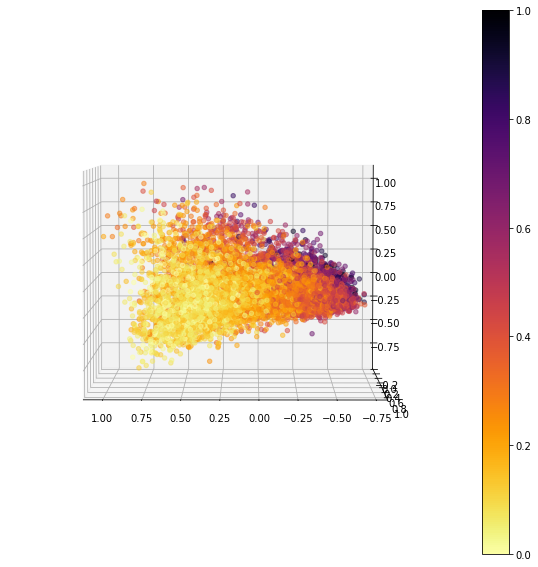

In [12]:
for c in kc_clipped.keys():
    fig, ax = plt.subplots(1, figsize=(10, 10), subplot_kw=dict(projection="3d"))
    ax.view_init(elev=15, azim=225) ### 
    ax.scatter3D(
        x0,
        x1,
        x2,
        color=kc_col[c],
        alpha = 0.5,
    )
    ax.azim, ax.dist, ax.elev = 90.35064935064912, 10, 3.77922077922085 ### 
    # fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
    fig.colorbar(cm.ScalarMappable(cmap=rinferno), ax=ax)
    plt.savefig(f'/stanley/WangLab/Connie/02.TEMPOmap/phate/phate_markerGeneExpr/kc{c}_qxjazimuth_wColorBar.pdf', transparent = True, dpi = 72)
    break

### average raw counts

In [5]:
_path = '/stanley/WangLab/Data/Analyzed/2021-07-16-Rena-Hela-EU'
st1 = pd.read_excel(os.path.join(_path, 'Supplementary Table 1  V2.xlsx'))

In [7]:
kc_counts_norm = dict()
for c in kc_counts.keys():
    n = np.count_nonzero(st1['Kinetic cluster']==c)
    kc_counts_norm[c] = kc_counts[c] / n
kc_counts_norm

{1: ArrayView([0.04923803, 0.03470878, 0.06901395, ..., 0.07528763,
            0.07670815, 0.09091335], dtype=float32),
 2: ArrayView([0.05684718, 0.01773633, 0.05639241, ..., 0.05122192,
            0.04641987, 0.05762466], dtype=float32),
 3: ArrayView([0.08835466, 0.04935677, 0.07616781, ..., 0.05361773,
            0.05147301, 0.0707754 ], dtype=float32),
 4: ArrayView([0.05966682, 0.02461257, 0.04922514, ..., 0.05644017,
            0.03412662, 0.06431555], dtype=float32),
 5: ArrayView([0.27752006, 0.15935723, 0.3002854 , ..., 0.23847416,
            0.17551701, 0.3090625 ], dtype=float32)}

<AxesSubplot:>

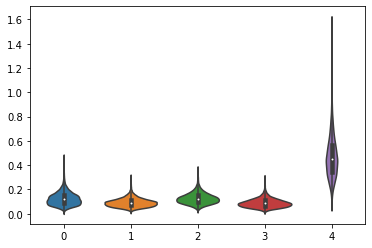

In [9]:
import seaborn as sns
sns.violinplot(data=[kc_counts_norm[1], kc_counts_norm[2], kc_counts_norm[3], kc_counts_norm[4], kc_counts_norm[5]])

In [19]:
# get cmap for each cluster 
kc_col = dict()
for c in kc_counts_norm.keys():
    kc_col[c] = rinferno(minmax_(kc_counts_norm[c]))
# kc_col

<AxesSubplot:>

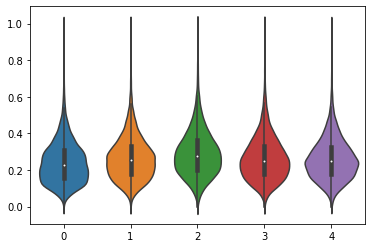

In [11]:
sns.violinplot(data=[minmax(kc_counts_norm[1]), minmax(kc_counts_norm[2]), minmax(kc_counts_norm[3]), minmax(kc_counts_norm[4]), minmax(kc_counts_norm[5])])

<AxesSubplot:>

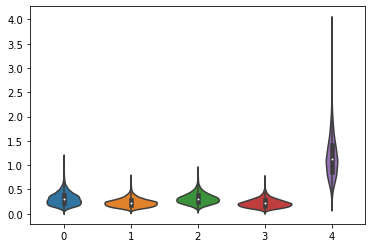

In [18]:
sns.violinplot(data=[minmax_(kc_counts_norm[1]), minmax_(kc_counts_norm[2]), minmax_(kc_counts_norm[3]), minmax_(kc_counts_norm[4]), minmax_(kc_counts_norm[5])])

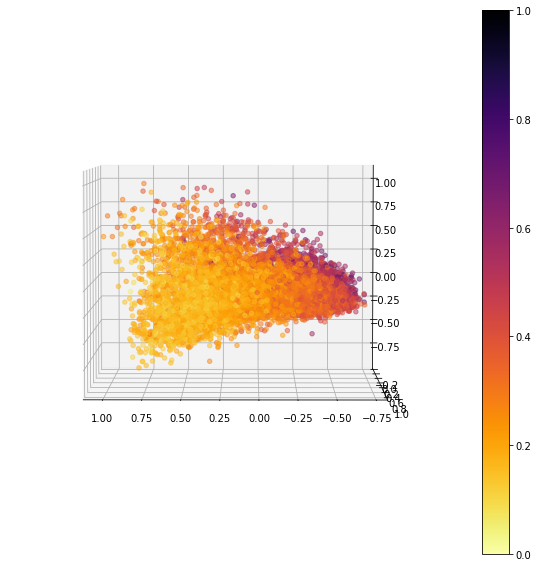

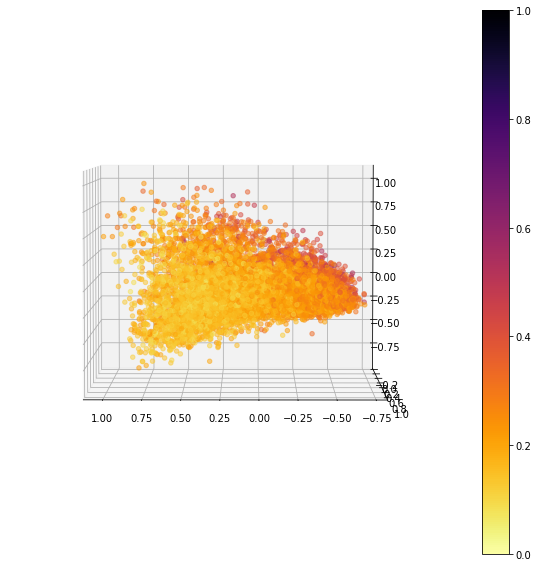

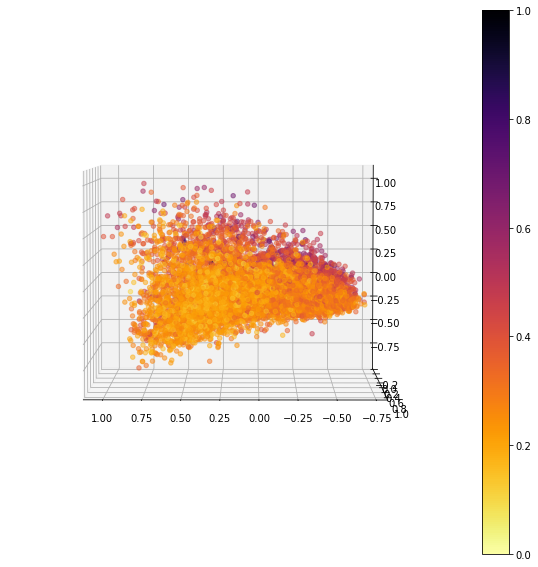

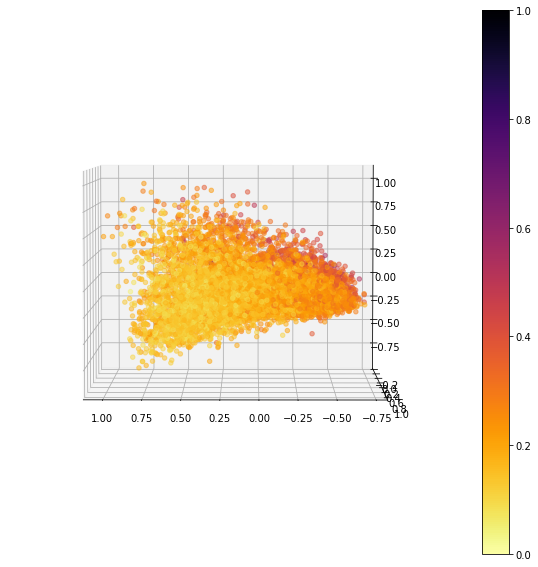

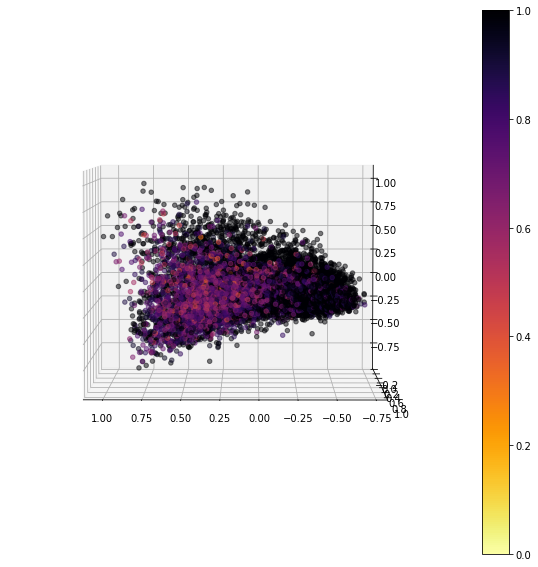

In [21]:
for c in kc_counts_norm.keys():
    fig, ax = plt.subplots(1, figsize=(10, 10), subplot_kw=dict(projection="3d"))
    ax.view_init(elev=15, azim=225) ### 
    ax.scatter3D(
        x0,
        x1,
        x2,
        color=kc_col[c],
        alpha = 0.5,
    )
    ax.azim, ax.dist, ax.elev = 90.35064935064912, 10, 3.77922077922085 ### 
    fig.colorbar(cm.ScalarMappable(cmap=rinferno), ax=ax)
    # break
    plt.savefig(f'/stanley/WangLab/Connie/02.TEMPOmap/phate/phate_markerGeneExpr/fixed_azimuth/kc{c}_qxjazimuth_raw-div-geneNum-1210.pdf', transparent = True, dpi = 72)

### counts percentage

In [4]:
with open("/stanley/WangLab/Connie/02.TEMPOmap/umap/kc_pct.pickle", "rb") as file:
    kc_pct = pickle.load(file) 

In [6]:
# clip 0.1-0.3
kc_clipped = dict()
for c in kc_pct.keys():
    clipped = []
    for ct in kc_pct[c]:
        if ct < 0.1:
            clipped.append(0.1)
        elif ct > 0.3:
            clipped.append(0.3)
        else: clipped.append(ct)
    kc_clipped[c] = clipped

In [8]:
# get cmap for each cluster 
kc_col = dict()
for c in kc_clipped.keys():
    kc_col[c] = rinferno(minmax(kc_clipped[c]))

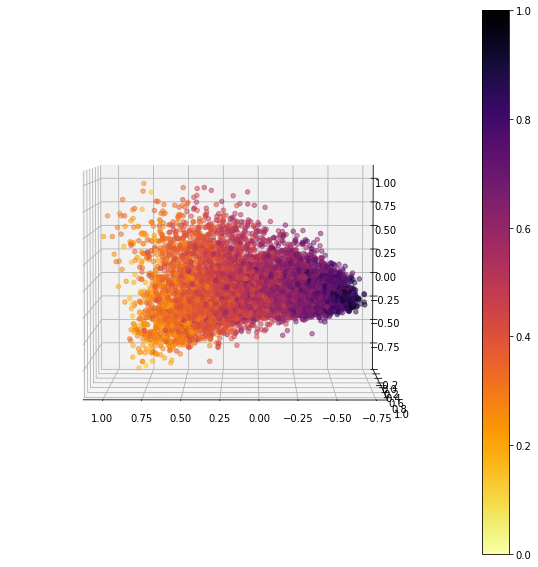

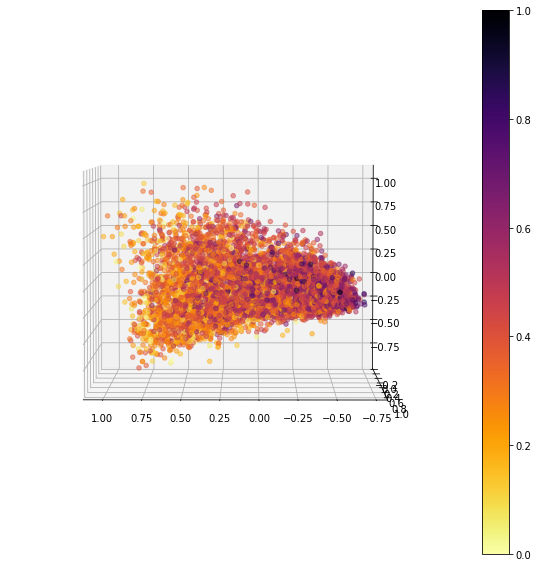

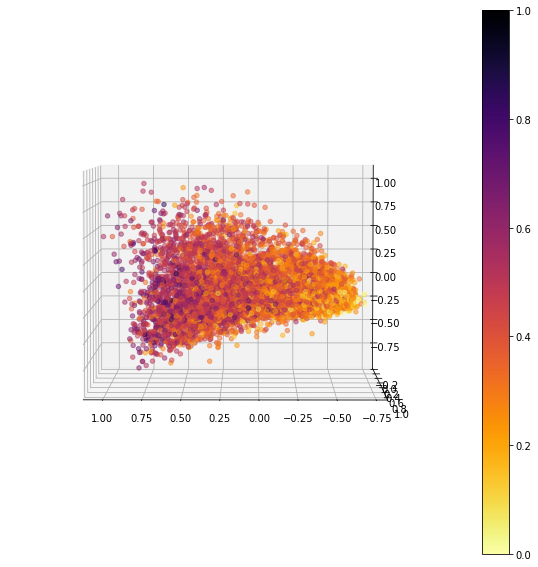

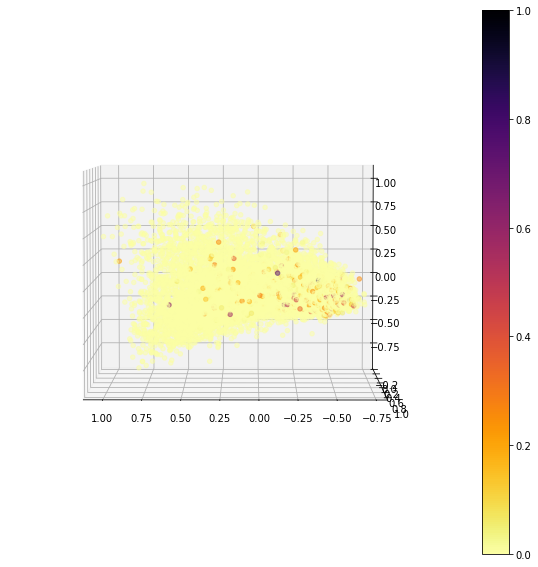

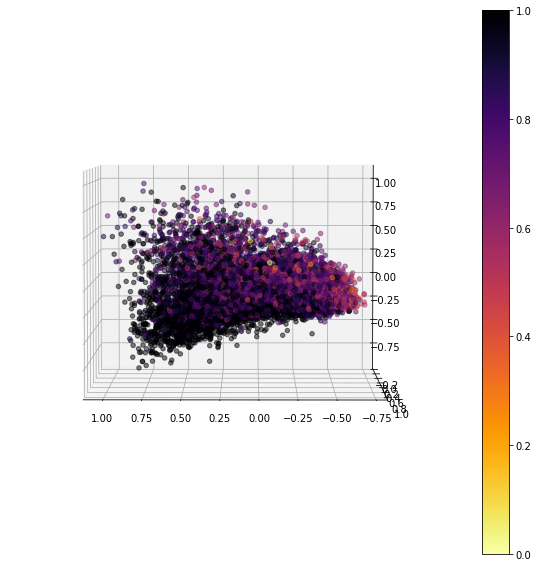

In [11]:
for c in kc_clipped.keys():
    fig, ax = plt.subplots(1, figsize=(10, 10), subplot_kw=dict(projection="3d"))
    ax.view_init(elev=15, azim=225) ### 
    ax.scatter3D(
        x0,
        x1,
        x2,
        color=kc_col[c],
        alpha = 0.5,
    )
    ax.azim, ax.dist, ax.elev = 90.35064935064912, 10, 3.77922077922085 ### 
    # fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
    fig.colorbar(cm.ScalarMappable(cmap=rinferno), ax=ax)
    # break
    plt.savefig(f'/stanley/WangLab/Connie/02.TEMPOmap/phate/phate_markerGeneExpr/kc{c}_qxjazimuth_pct.pdf', transparent = True, dpi = 72)